In [106]:
import tweepy
import re
from textblob import TextBlob
from wordcloud import WordCloud, ImageColorGenerator
import datetime as DT
import yfinance as yf
import matplotlib.pyplot as plt
import numpy
import json
import time
import pandas as pd

In [43]:
api_key = "AgxyOG7COFIJOVqztfoFzJNDm"
api_secret_key = "AsNmf8V5di85kmgmbC51i4ANhcj7g13oWF5udl7OjaDXZN8b87"
access_token = "1336375652958629888-t4QTnEySinwPs4JV06QEx9998HK3nY"
access_token_secret = "7j0BvfD9DEyDkVB14srZISRssnHzn6ZgkN84oJdUVlbAo"

In [81]:
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [71]:
hasil_mingguan = []
nilai_sentimen_mingguan = []

for i in range(7):
    hasilAnalisis = []
    today = DT.date.today()
    dayH = today - DT.timedelta(days=i)
    dayHminusOne = dayH - DT.timedelta(days=1)
    print(str(dayH))
    hasilSearch = api.search(q="Apple", lang="en", count=100, since=str(dayHminusOne), until=str(dayH))
    
    for tweet in hasilSearch:
        tweet_properties = {}
        tweet_properties["tanggal_tweet"] = tweet.created_at
        tweet_properties["user"] = tweet.user.screen_name
        tweet_properties["tweeeettt"] = tweet.text
        tweet_bersih = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", tweet.text).split())
        
        analysis = TextBlob(tweet_bersih)
        
        if analysis.sentiment.polarity > 0.0:
            tweet_properties["sentimen"] = "positif"
        elif analysis.sentiment.polarity == 0.0:
            tweet_properties["sentimen"] = "netral"
        else:
            tweet_properties["sentimen"] = "negatif"
        
        if tweet.retweet_count > 0:
            if tweet_properties not in hasilAnalisis:
                hasilAnalisis.append(tweet_properties)
        else:
            hasilAnalisis.append(tweet_properties)
        
        tweet_positif = [t for t in hasilAnalisis if t["sentimen"]=="positif"]
        tweet_netral = [t for t in hasilAnalisis if t["sentimen"]=="netral"]
        tweet_negatif = [t for t in hasilAnalisis if t["sentimen"]=="negatif"]
        
    temp = []
    temp.append(100*len(tweet_positif)/len(hasilAnalisis))
    temp.append(100*len(tweet_netral)/len(hasilAnalisis))
    temp.append(100*len(tweet_negatif)/len(hasilAnalisis))
    nilai_sentimen_mingguan.append(temp)
    hasil_mingguan.append(hasilAnalisis)
    
    print("Hasil Sentimen")
    print("positif: ", len(tweet_positif), "({}%)".format(100*len(tweet_positif)/len(hasilAnalisis)))
    print("netral: ", len(tweet_positif), "({}%)".format(100*len(tweet_netral)/len(hasilAnalisis)))
    print("negatif: ", len(tweet_positif), "({}%)".format(100*len(tweet_negatif)/len(hasilAnalisis)))

2020-12-09
Hasil Sentimen
positif:  46 (46.0%)
netral:  46 (39.0%)
negatif:  46 (15.0%)
2020-12-08
Hasil Sentimen
positif:  48 (48.0%)
netral:  48 (34.0%)
negatif:  48 (18.0%)
2020-12-07
Hasil Sentimen
positif:  39 (39.0%)
netral:  39 (53.0%)
negatif:  39 (8.0%)
2020-12-06
Hasil Sentimen
positif:  35 (38.888888888888886%)
netral:  35 (52.22222222222222%)
negatif:  35 (8.88888888888889%)
2020-12-05
Hasil Sentimen
positif:  50 (50.0%)
netral:  50 (37.0%)
negatif:  50 (13.0%)
2020-12-04
Hasil Sentimen
positif:  50 (50.0%)
netral:  50 (37.0%)
negatif:  50 (13.0%)
2020-12-03
Hasil Sentimen
positif:  44 (44.0%)
netral:  44 (51.0%)
negatif:  44 (5.0%)


In [72]:
today = DT.date.today()
week = today - DT.timedelta(days=7)
stock_yahoo = yf.download('AAPL', week, today)

time_series = [today - DT.timedelta(days= (t+1)) for t in  range(7)]
positive_sentiment =  [p[0] for p in nilai_sentimen_mingguan]
neutral_sentiment = [p[1] for p in nilai_sentimen_mingguan]
negative_sentiment = [p[2] for p in nilai_sentimen_mingguan]
stock_yahoo_clean = [p.split("   ") for p in str(stock_yahoo['Adj Close']).split("\n") if "   " in p]
stock_weekly = []
for x in time_series:
    temp = [p[0] for p in stock_yahoo_clean]
    try:
        stock_weekly.append(float(stock_yahoo_clean[temp.index(str(x))][1]))
    except Exception as e:
        stock_weekly.append(float(0.0))
for idx,x in enumerate(stock_weekly):
    if x == 0.0:
        try:
            if stock_weekly[idx+1] == 0.0:
                stock_weekly[idx] = stock_weekly[idx+2]
            else:
                stock_weekly[idx] = stock_weekly[idx+1]
        except Exception as e:
            print(e)

[*********************100%***********************]  1 of 1 completed


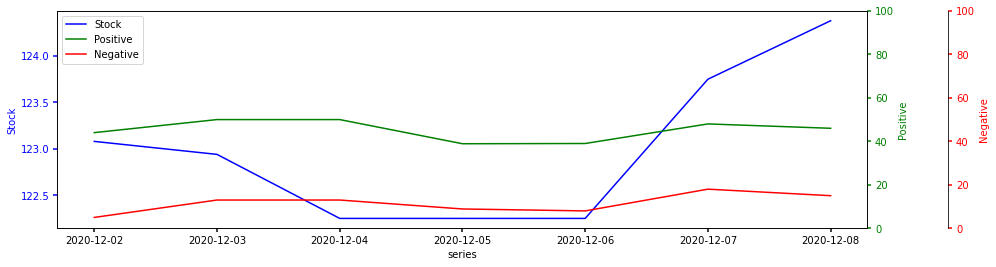

In [82]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)
        
fig, host = plt.subplots()
fig.subplots_adjust(right=2)

par1 = host.twinx()
par2 = host.twinx()

par2.spines["right"].set_position(("axes", 1.1))

make_patch_spines_invisible(par2)

par2.spines["right"].set_visible(True)

p1, = host.plot(time_series, stock_weekly, "b-", label="Stock")
p2, = par1.plot(time_series, positive_sentiment, "g-", label="Positive")
p3, = par2.plot(time_series, negative_sentiment, "r-", label="Negative")

par1.set_ylim(0, 100)
par2.set_ylim(0, 100)

host.set_xlabel("series")
host.set_ylabel("Stock")
par1.set_ylabel("Positive")
par2.set_ylabel("Negative")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size = 4, width = 1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines])

plt.show()

In [132]:
df = pd.DataFrame([tweet.text for tweet in hasilSearch], columns=["Tweets"])

In [133]:
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    return text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

In [134]:
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(colormap="gray", width=1600, height=800, random_state=30, max_font_size=200, min_font_size=20).generate(allWords)

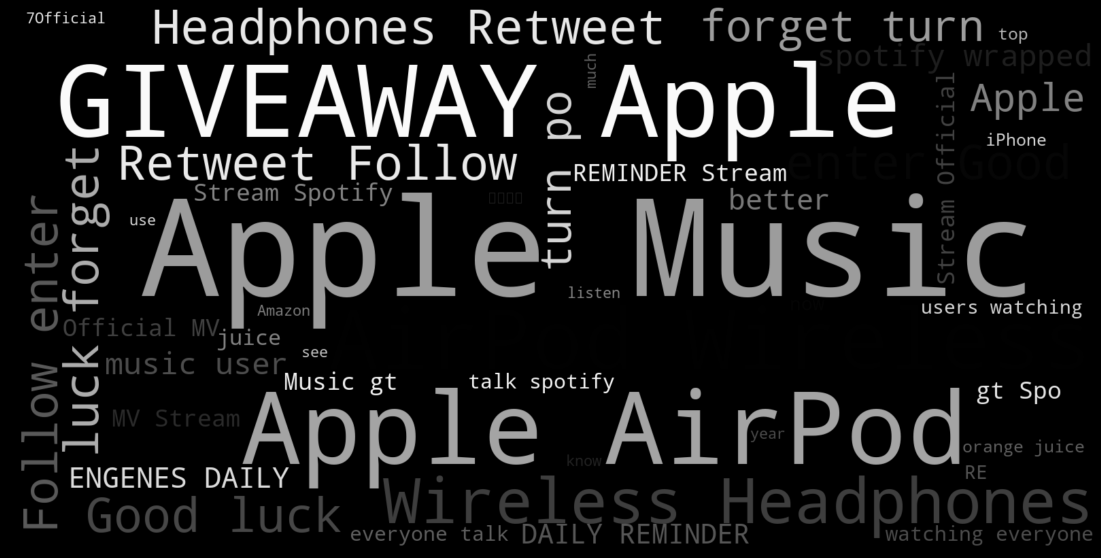

In [135]:
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()